# Shared iSNVs in SCAN transmission pairs

This notebook examines iSNVs in 8 SCAN transmission pairs.

Transmission pairs were identified by looking at all SCAN samples, finding samples from the same household, and eliminating household in which all samples had a symptom onset date within a day or two of each other.
If samples lacked a symptom onset date, they were not eliminated at this stage. For households with greater than 2 samples, symptom onset & the phylogenetic tree were used to construct transmission pairs. Note: It's possible for one sample to be part of more than one transmission pair because one person could have infected two individuals.

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [106]:
def load_df(file):
    '''
    Loads metadata tsv as df.
    '''
    with open(file) as tfile:
        df = pd.read_csv(tfile, sep = '\t')
        if 'nwgc_id' in df.columns:
            df['nwgc_id'] = df.nwgc_id.astype('str')
            
        if 'position' and 'variant' in df.columns:
            df = df[df['variant'].map(len) < 2]
            df['snv'] = df[['genome', 'position', 'variant']].apply(
                lambda x: ''.join(x.dropna().astype(str)),
                axis=1)
    return df

pairs_snvs = load_df('../results/snvs_scan-new_pairs.tsv')
pairs_meta = load_df('../results/metadata_scan-new_pairs.tsv')

In [107]:
pairs_snvs

,strain,nwgc_id,position,variant,genome,protein,aa_position,aa_variant,aa_genome,mut_type,...,frequency,origin,batch,resolution,address_identifier,avg_ct,notes,age,date,snv
0,USA/WA-S2734/2020,444501,106,T,C,5'UTR,NaN,NaN,NaN,NC,...,0.418803,scan,20200831_fastq,pair,15dd9abf1dc89c1c8ddbc7797182d04de9515cf599a6be...,28.333208,"gave to both, identical",52.08,2020-07-13,C106T
2,USA/WA-S2734/2020,444501,529,T,G,ORF1a,88,L,L,S,...,0.089947,scan,20200831_fastq,pair,15dd9abf1dc89c1c8ddbc7797182d04de9515cf599a6be...,28.333208,"gave to both, identical",52.08,2020-07-13,G529T
3,USA/WA-S2734/2020,444501,736,C,T,ORF1a,157,F,F,S,...,0.116022,scan,20200831_fastq,pair,15dd9abf1dc89c1c8ddbc7797182d04de9515cf599a6be...,28.333208,"gave to both, identical",52.08,2020-07-13,T736C
4,USA/WA-S2734/2020,444501,741,G,A,ORF1a,159,G,E,NS,...,0.162011,scan,20200831_fastq,pair,15dd9abf1dc89c1c8ddbc7797182d04de9515cf599a6be...,28.333208,"gave to both, identical",52.08,2020-07-13,A741G
5,USA/WA-S2734/2020,444501,801,T,G,ORF1a,179,V,G,NS,...,0.118421,scan,20200831_fastq,pair,15dd9abf1dc89c1c8ddbc7797182d04de9515cf599a6be...,28.333208,"gave to both, identical",52.08,2020-07-13,G801T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035,USA/WA-S595/2020,401503,26524,C,T,M,1,T,M,NS,...,0.010958,scan,20200511_fastq,pair,f95458a50e7c3ac0a9721aa348c8276470b5837f2545f2...,23.684280,+1 mutation,59.50,2020-04-12,T26524C
3037,USA/WA-S595/2020,401503,26600,T,C,M,26,F,F,S,...,0.019578,scan,20200511_fastq,pair,f95458a50e7c3ac0a9721aa348c8276470b5837f2545f2...,23.684280,+1 mutation,59.50,2020-04-12,C26600T
3039,USA/WA-S595/2020,401503,26919,T,C,M,133,F,L,NS,...,0.010183,scan,20200511_fastq,pair,f95458a50e7c3ac0a9721aa348c8276470b5837f2545f2...,23.684280,+1 mutation,59.50,2020-04-12,C26919T
3043,USA/WA-S595/2020,401503,27746,T,G,ORF7a,118,I,R,NS,...,0.012137,scan,20200511_fastq,pair,f95458a50e7c3ac0a9721aa348c8276470b5837f2545f2...,23.684280,+1 mutation,59.50,2020-04-12,G27746T


## How many SNVs per sample?

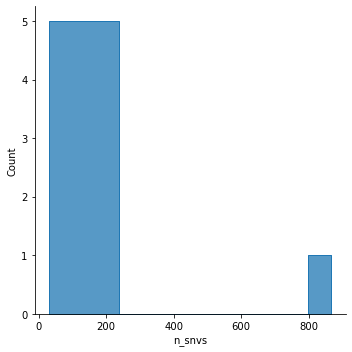

In [108]:
sns.displot(pairs_meta, x='n_snvs', element='step')

In [5]:
stats.ranksums(pairs_meta.loc[pairs_meta.pair_type == 'household', 'n_snvs'], pairs_meta.loc[pairs_meta.pair_type == 'random', 'n_snvs'])

RanksumsResult(statistic=0.46188021535170054, pvalue=0.6441672226837103)

iSNVs per sample in Household pairs

In [6]:
print(pairs_meta.loc[pairs_meta.pair_type == 'household', 'n_snvs'].min())
print(pairs_meta.loc[pairs_meta.pair_type == 'household', 'n_snvs'].max())
print(pairs_meta.loc[pairs_meta.pair_type == 'household', 'n_snvs'].median())

8
193
26.5


iSNVs per sample in Random pairs

In [7]:
print(pairs_meta.loc[pairs_meta.pair_type == 'random', 'n_snvs'].min())
print(pairs_meta.loc[pairs_meta.pair_type == 'random', 'n_snvs'].max())
print(pairs_meta.loc[pairs_meta.pair_type == 'random', 'n_snvs'].median())

5
119
16.5


## What is the distribution of iSNVs frequency?

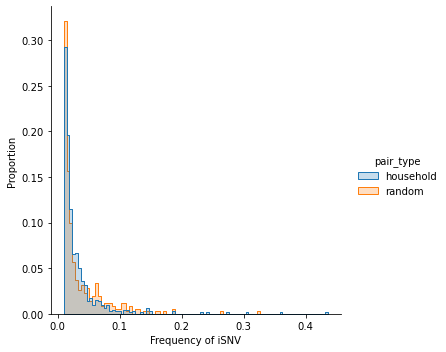

In [8]:
ax = sns.displot(pairs_snvs, x='frequency', hue='pair_type', stat='probability', common_norm=False, element='step')
ax.set(ylabel='Proportion', xlabel='Frequency of iSNV')

In [9]:
stats.ranksums(pairs_snvs.loc[pairs_snvs.pair_type == 'household', 'frequency'], pairs_snvs.loc[pairs_snvs.pair_type == 'random', 'frequency'])

RanksumsResult(statistic=-0.8283043911374233, pvalue=0.40749813665188417)

Frequency of iSNVs in Household pairs

In [10]:
print(pairs_snvs.loc[pairs_snvs.pair_type == 'household', 'frequency'].min())
print(pairs_snvs.loc[pairs_snvs.pair_type == 'household', 'frequency'].max())
print(pairs_snvs.loc[pairs_snvs.pair_type == 'household', 'frequency'].median())

0.010008963250672244
0.4356435643564357
0.019445878961340632


Frequency of iSNVs in Random pairs

In [11]:
print(pairs_snvs.loc[pairs_snvs.pair_type == 'random', 'frequency'].min())
print(pairs_snvs.loc[pairs_snvs.pair_type == 'random', 'frequency'].max())
print(pairs_snvs.loc[pairs_snvs.pair_type == 'random', 'frequency'].median())

0.010004001600640256
0.3217922606924644
0.019941132916089184


## What types of mutations are the variants?

In [101]:
# recoding non-coding mutations as synonymous
pairs_snvs['mut_type'] = pairs_snvs.mut_type.replace(to_replace='NC', value='S')

ax = sns.displot(pairs_snvs, x='mut_type', hue='pair_type', stat='probability', common_norm=False, multiple='dodge')
ax.set(ylabel='Proportion', xlabel='Type of mutation')

ValueError: Could not interpret value `pair_type` for parameter `hue`

In [13]:
def chi2(df):
    cross_tab = pd.crosstab(df['pair_type'], df['mut_type'])
    chi2, p, dof, ex = stats.chi2_contingency(cross_tab, correction = False)
    return p

chi2(pairs_snvs)

0.014893495804383162

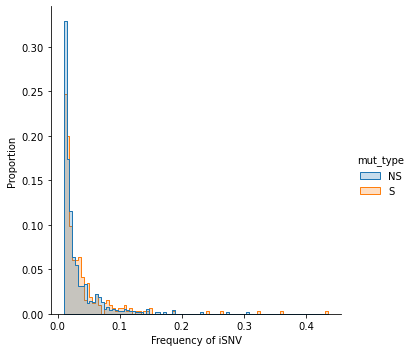

In [14]:
ax = sns.displot(pairs_snvs, x='frequency', hue='mut_type', stat='probability', common_norm=False, element='step')
ax.set(ylabel='Proportion', xlabel='Frequency of iSNV')

## Where in the genome are SNVs located?

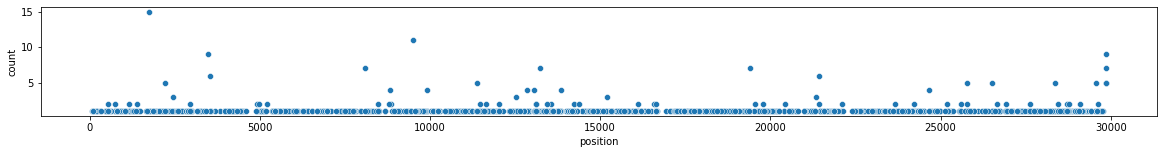

In [109]:
df_location = pd.value_counts(pairs_snvs.position).to_frame(name='count').rename_axis('position').reset_index()
plt.figure(figsize=(20,2))
ax = sns.scatterplot(data=df_location, x='position', y='count')


In [110]:
df_location.head(n=20)

,position,count
0,1730,15
1,9502,11
2,3466,9
3,29867,9
4,19406,7
5,8084,7
6,29865,7
7,13225,7
8,3547,6
9,21440,6


## Are iSNVs shared by transmission pairs?

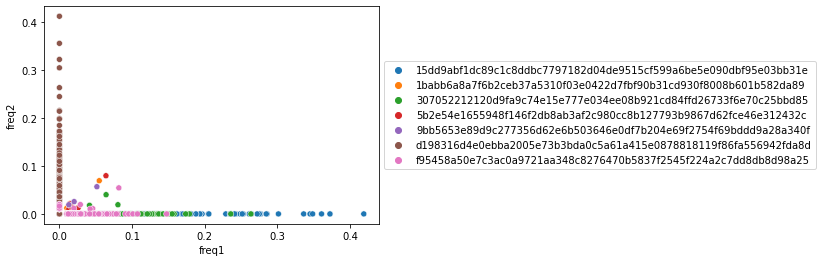

In [126]:
def pair_frequencies(df):
    freq1 = []
    freq2 = []
    address_id = []
    variants = []
    for address in df.address_identifier.unique():
        samples = df.loc[df.address_identifier==address, 'nwgc_id'].unique()
        snvs = df.loc[df.nwgc_id.isin(samples), 'snv'].unique()
        df1 = df[df.nwgc_id == samples[0]]
        df2 = df[df.nwgc_id == samples[1]]
        for snv in snvs:
            if snv in df1.snv.values: 
                freq1.append(df1.loc[df1.snv==snv, 'frequency'].values[0])
            else:
                freq1.append(0)
            if snv in df2.snv.values:
                freq2.append(df2.loc[df2.snv==snv, 'frequency'].values[0])
            else:
                freq2.append(0)
            address_id.append(address)
            variants.append(snv)
    frequencies = pd.DataFrame({'freq1':freq1, 'freq2':freq2, 'address_id':address_id, 'snv':variants})
    return frequencies
        
frequencies = pair_frequencies(pairs_snvs)
fig, ax = plt.subplots()
sns.scatterplot(data = frequencies, x='freq1', y='freq2', ax=ax, hue = 'address_id')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))



In [123]:
frequencies[(frequencies.freq1 > 0) & (frequencies.freq2 > 0)]

,freq1,freq2,address_id,snv
139,0.054795,0.069226,1babb6a8a7f6b2ceb37a5310f03e0422d7fbf90b31cd93...,G1730A
145,0.010150,0.012157,1babb6a8a7f6b2ceb37a5310f03e0422d7fbf90b31cd93...,T3466C
157,0.015946,0.012636,1babb6a8a7f6b2ceb37a5310f03e0422d7fbf90b31cd93...,C13068T
225,0.064189,0.040108,307052212120d9fa9c74e15e777e034ee08b921cd84ffd...,T3466C
243,0.041379,0.017915,307052212120d9fa9c74e15e777e034ee08b921cd84ffd...,T11374C
250,0.080508,0.019167,307052212120d9fa9c74e15e777e034ee08b921cd84ffd...,T12842C
327,0.064033,0.079638,5b2e54e1655948f146f2db8ab3af2c980cc8b127793b98...,G1730A
328,0.014418,0.021417,5b2e54e1655948f146f2db8ab3af2c980cc8b127793b98...,T3466C
329,0.012987,0.010320,5b2e54e1655948f146f2db8ab3af2c980cc8b127793b98...,G8084A
335,0.015592,0.017182,5b2e54e1655948f146f2db8ab3af2c980cc8b127793b98...,C21440T


In [141]:
def compare_pairwise(df):
    #df = df[df.frequency>=0.03]
    samples = df['nwgc_id'].unique()
    length = len(samples)
    adj_matrix = np.zeros((length, length, 4))
    for indexA, sampleA in enumerate(samples):
        for indexB, sampleB in enumerate(samples):
            if indexA != indexB:
                dfA = df[df.nwgc_id==sampleA]
                dfB = df[df.nwgc_id==sampleB]
                comparison = 0
                if dfA.address_identifier.values[0] == dfB.address_identifier.values[0]:
                    comparison = 1
                df_merged = dfA.merge(dfB, how = 'inner', on ='snv')
                n_shared = len(df_merged.index)
                adj_matrix[indexA, indexB, 0] = n_shared
                adj_matrix[indexB, indexA, 0] = n_shared
                adj_matrix[indexA, indexB, 1] = comparison
                adj_matrix[indexB, indexA, 1] = comparison
    return adj_matrix

matrix = compare_pairwise(pairs_snvs)

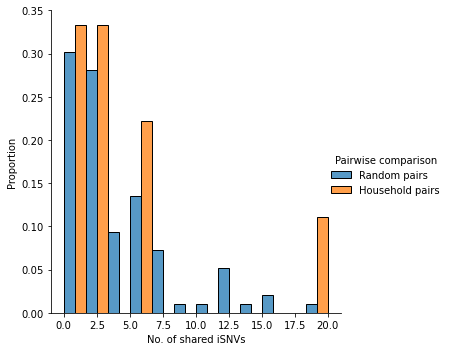

In [142]:
def shared_df(matrix):
    shared_m = matrix[:, :, 0]
    pair_m = matrix[:, :, 1]
    length = len(shared_m)
    shared = shared_m[np.tril_indices(n=length, k=-1)]
    pair = pair_m[np.tril_indices(n=length, k=-1)]
    shared_df = pd.DataFrame({'n_shared':shared, 'pair_comparison':pair})
    return shared_df

shared_df = shared_df(matrix)

def plot_shared(df):
    ax = sns.displot(df, x='n_shared', hue = 'pair_comparison', stat = 'probability', common_norm=False, multiple='dodge')
    ax.set(ylabel='Proportion', xlabel='No. of shared iSNVs')
    ax._legend.set_title('Pairwise comparison')
    new_labels = ['Random pairs', 'Household pairs']
    for t, l in zip(ax._legend.texts, new_labels): 
        t.set_text(l)
    return plt.show()

plot_shared(shared_df)

In [100]:
def shared_by_pair(df):
    pairs = []
    pair_types = []
    shared_snvs = []
    for pair in df.pair.unique():
        samples = df.loc[df.pair==pair, 'nwgc_id'].unique()
        s1 = set(df.loc[df.nwgc_id==samples[0], 'snv'])
        s2 = set(df.loc[df.nwgc_id==samples[1], 'snv'])
        shared = s1.intersection(s2)
        n_shared = len(shared)
        pair_type = df.loc[df.pair == pair, 'pair_type'].unique()[0]
        pairs.append(pair)
        pair_types.append(pair_type) 
        shared_snvs.append(n_shared)
    shared_pairs = pd.DataFrame({'pair' : pairs, 'n_shared' : shared_snvs, 'pair_type' : pair_types})
    return shared_pairs

shared_pairs = shared_by_pair(pairs_snvs)
fig, ax = plt.subplots()
sns.histplot(shared_pairs, x='n_shared', hue = 'pair_type', multiple='stack', ax =ax)
ax.set_xticks(np.arange(min(shared_pairs['n_shared'])+0.5, max(shared_pairs['n_shared'])+0.5, 1.0))
ax.set_xticklabels(range(7))
plt.show()
        

        

AttributeError: 'DataFrame' object has no attribute 'pair'

In [19]:
stats.ranksums(shared_pairs.loc[shared_pairs.pair_type == 'household', 'n_shared'], shared_pairs.loc[shared_pairs.pair_type == 'random', 'n_shared'])

RanksumsResult(statistic=0.560448538317805, pvalue=0.5751735319201967)